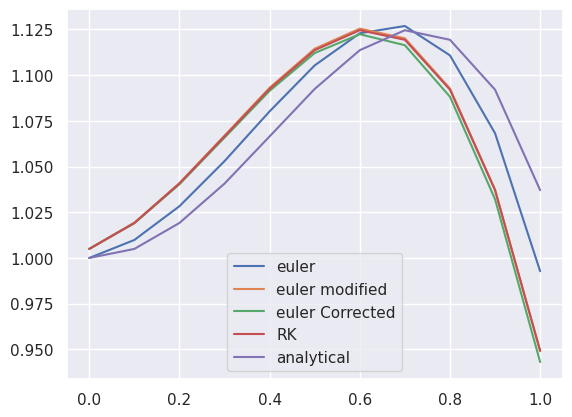

In [14]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def euler(ode, x0, y0, h, xn):
    y = y0
    x = x0
    y_numeric = []

    while x <= xn:
        y = y + h * ode(x, y)
        x += h
        y_numeric.append(y)

    return y_numeric

def euler_modified(ode, x0, y0, h, xn):
    
    y = y0
    x = x0
    y_numeric = []

    while x <= xn:
        y = y + h * (ode(x + h/2, y + h * (ode(x, y))/2))
        x += h
        y_numeric.append(y)

    return y_numeric

def euler_corrected(ode, x0, y0, h, xn):

    y = y0
    x = x0
    y_numeric = []

    while x <= xn:

        y = y + h * 0.5 * (ode(x, y) + ode(x + h, y + h * ode(x, y))) 

        y_numeric.append(y)
        x += h

    return y_numeric 

def RK4(ode, func, x0, y0, h, xn):

    x = x0
    y = y0
    y_numeric = []
    y_analytic = []
    x_list = []

    while (x <= xn):

        k1 = h * ode(x, y)
        k2 = h * ode(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * ode(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * ode(x + h, y + k3)

        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
       
        y_numeric.append(y)
        y_analytic.append(func(x))
        
        x_list.append(x)
        x = x + h
 
    return y_numeric, y_analytic, x_list
 
def main():
    ODE = lambda x,y: math.sin(2 * x) - y * math.tan(x)
    func = lambda x: 3 * math.cos(x) - 2 * pow(math.cos(x), 2)
    x0 = 0
    y0 = 1
    h = 0.1
    xn = 1

    y_euler = euler(ODE, x0, y0, h, xn)
    y_euler_mod = euler_modified(ODE, x0, y0, h, xn)
    y_euler_cor = euler_corrected(ODE, x0, y0, h, xn)
    y_numeric_RK, y_analytic, x_list = RK4(ode=ODE, func=func, x0=x0, y0=y0, h=h, xn=xn)

    plt.plot(x_list, y_euler, label='euler')
    plt.plot(x_list, y_euler_mod, label='euler modified')
    plt.plot(x_list, y_euler_cor, label='euler Corrected')
    plt.plot(x_list, y_numeric_RK, label='RK')
    plt.plot(x_list, y_analytic, label='analytical')
    plt.legend()
    plt.show()

main()